# Decison Tree Classifier for Classifying Music Emotions
---
## About the Dataset

For this experiment, our dataset contains 267 music samples that were labelled by 2 music experts. The dataset has a combination of high level and low level features. The high level features are tempo, arousal, and scale, which were all labelled by the music experts. The low level features were extracted from the music samples using the JAudio software.

---
## Libraries

We used the pandas and csv libraries to load the dataset, which is a csv file. Then we used numpy to manipulate the loaded dataset. We used the sci kit learn library for the decision tree algorithm.

In [1]:
import os
import numpy as np
import pandas as pd
import csv
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, norm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel, SelectKBest, VarianceThreshold, chi2, f_classif, mutual_info_classif
from XLB import *

import warnings
warnings.filterwarnings('ignore')

Here we load the data from the csv file and preprocess it by removing the header row and the filename column

After the initial preprocessing step, we sperated the music features and the labelled emotion into the x_train and y_train arrays respectively

In [2]:
# extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=50,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.25, penalty="l1", dual=False,\
#                                     random_state=481516234))
# WINNER: 47.62% 0.45
feat_sel_2 = SelectKBest(mutual_info_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

Here we perform different methods to deal with imbalanced datasets. We used the oversampling *Insert link to oversampling if needed* and SMOTE methodology *Insert link to SMOTE if needed*

Here we defined a function that will train the model and perform the hyperparameter search. x_train is the input data, y_train is the labels for the input data, and hp_search is the algorithm for hyperparameter search

This function trains the model, using the previously defined train_model function, and displays the confusion matrix of the model. 

The following cells are the experiments we ran with the default dataset, oversampled version, and SMOTE version using random search as the hyperparameter search algorithm

---
This cell instantiates the decison tree object and the hyperparameter search object.

In [4]:
# Decision Tree
random_search_iterations = 1000
n_splits = 5
rand_seed = 481516234

parameters = {
    'criterion':["gini", "entropy"], 
    'splitter':["best", "random"], 
    'max_depth':range(1, num_features + 1), 
    'min_samples_split': uniform(loc=0.00,scale=1.0),
    'min_samples_leaf': uniform(loc=0.0001,scale=0.4999)
}

# train classifier for SMOTE data
dt = tree.DecisionTreeClassifier(random_state=rand_seed)
rscv = RandomizedSearchCV(dt, parameters,cv=n_splits, random_state=rand_seed, n_iter=random_search_iterations,n_jobs=-1)

This model is trained using the default 

Best Score: 0.3417
criterion => gini
max_depth => 38
min_samples_leaf => 0.23316433011616744
min_samples_split => 0.4783433000713565
splitter => best
Splits: 5
Vanilla Train Accuracy: 35.4115%


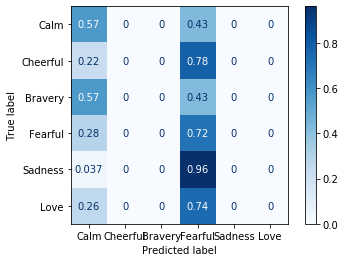

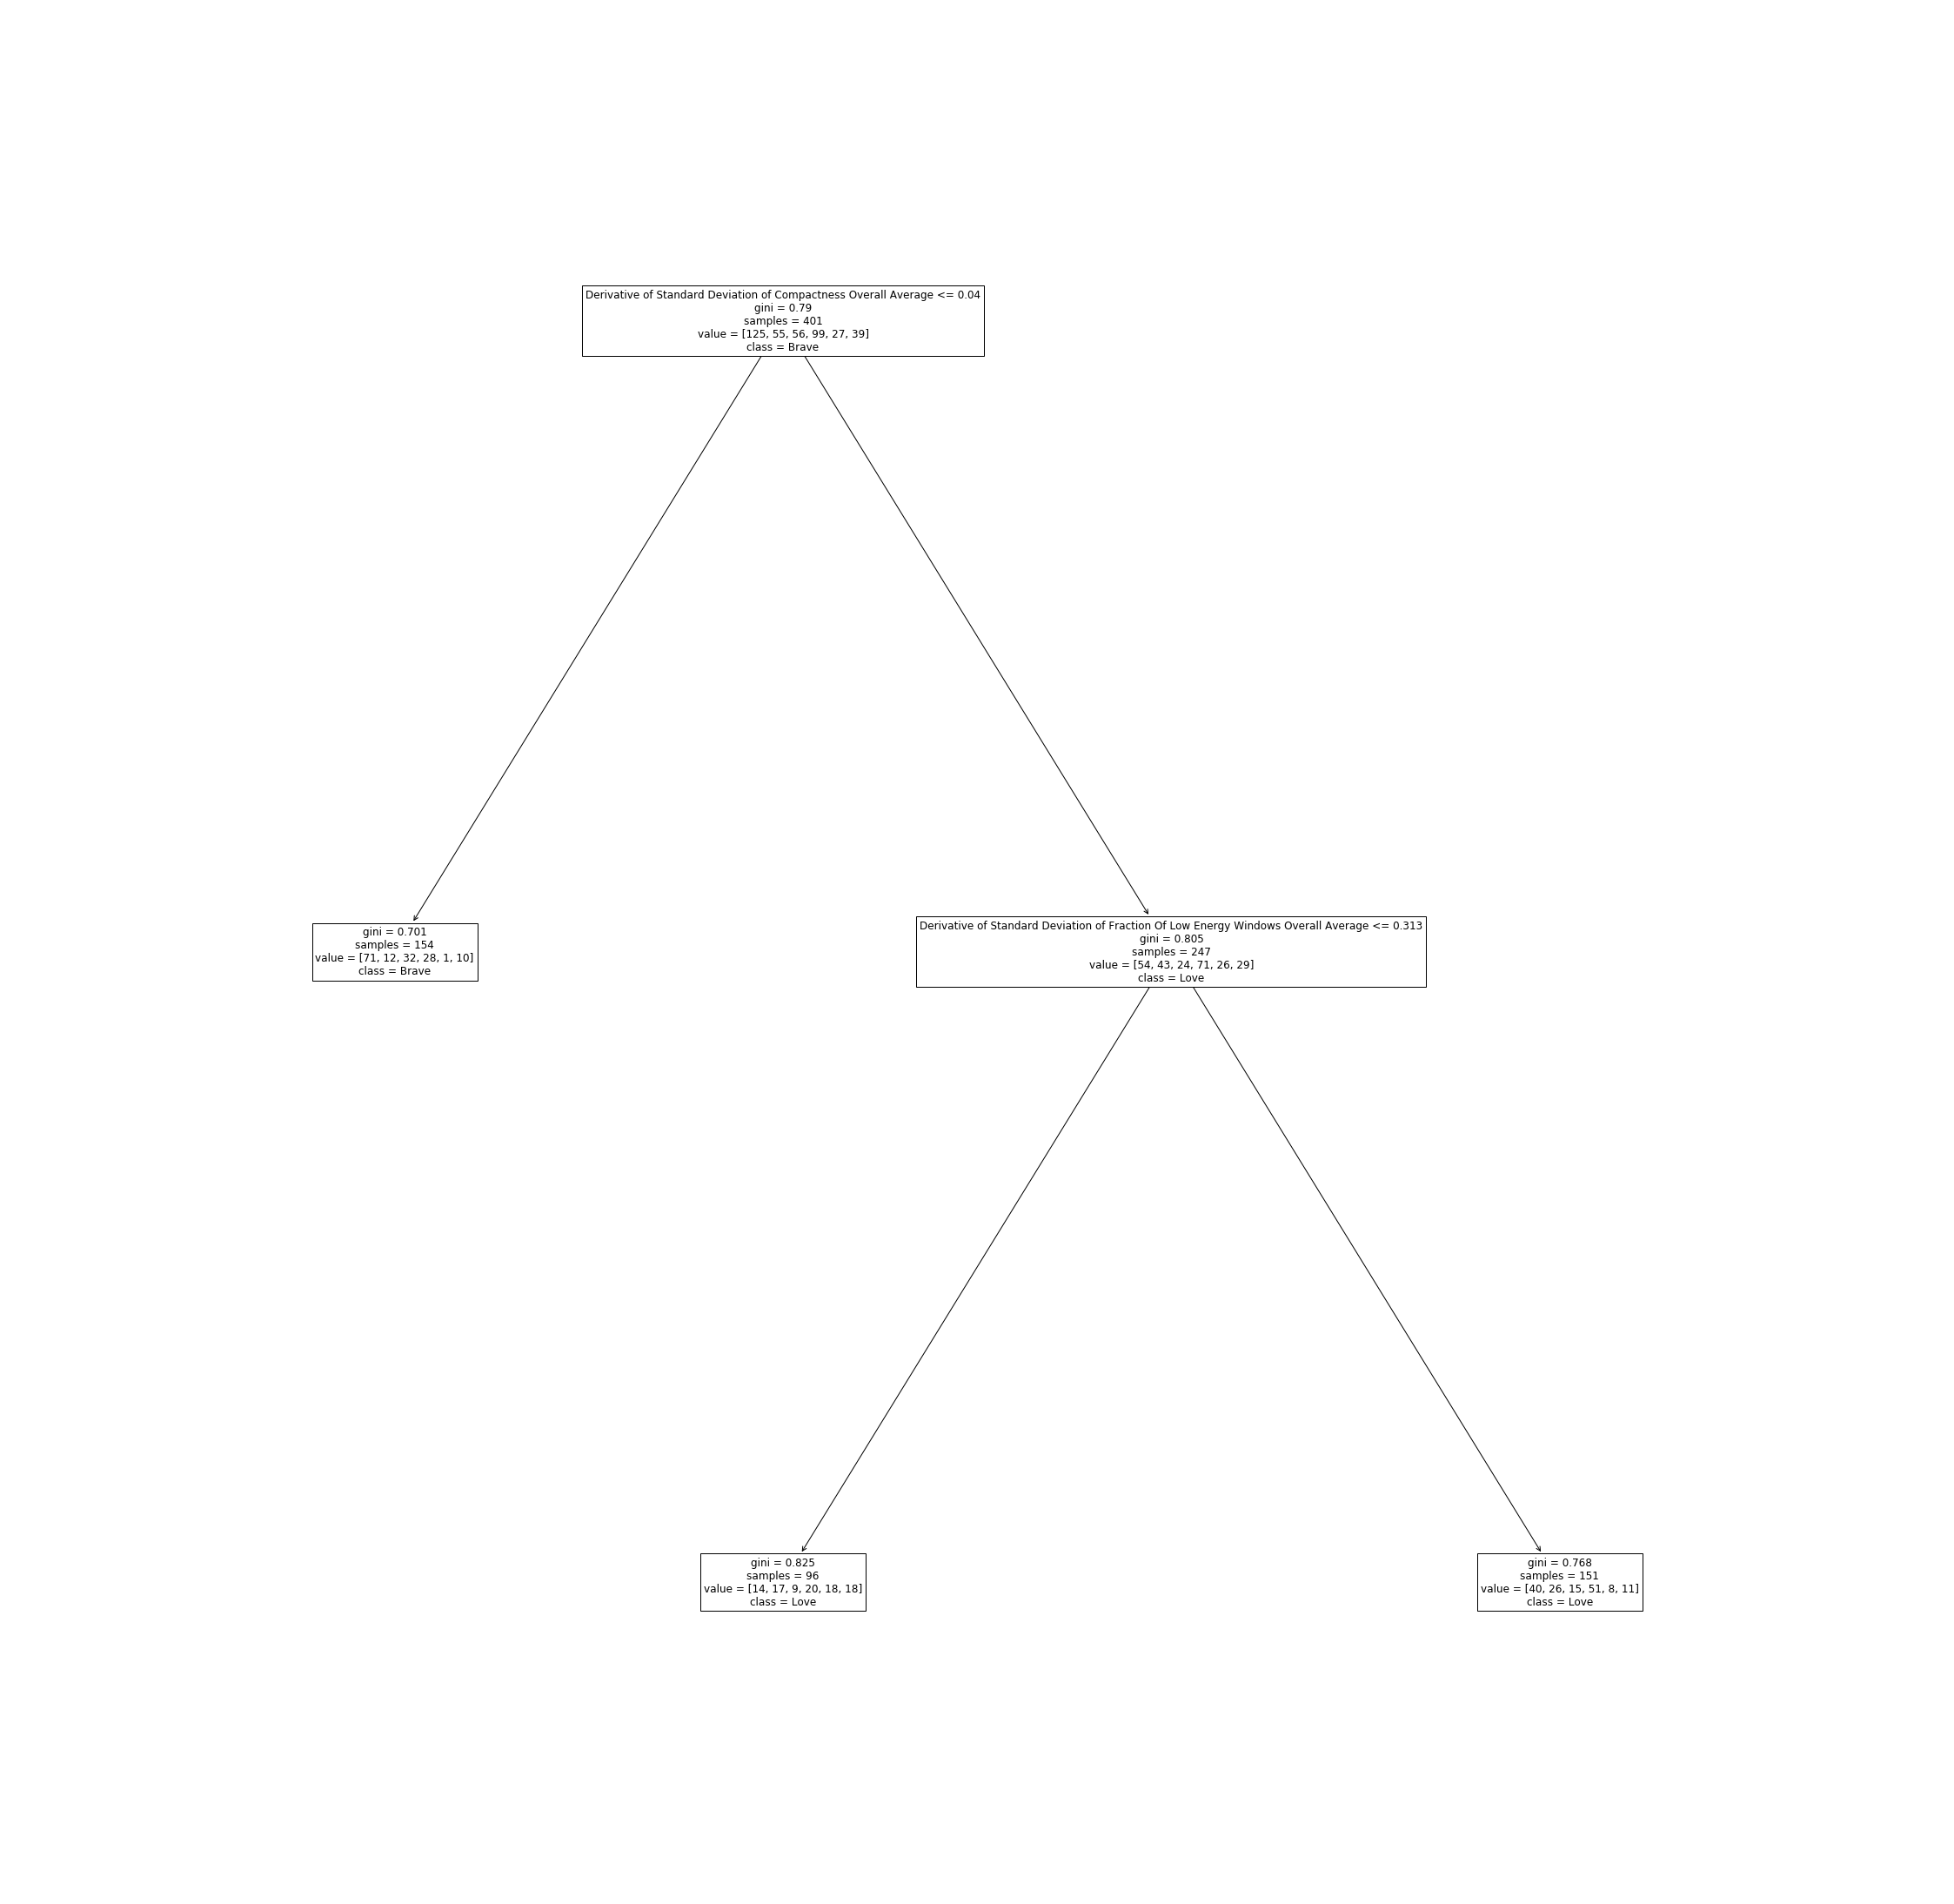

Vanilla Validation Accuracy: 19.05%
Vanilla F1-score: 0.06


(19.047619047619047, 0.0634920634920635)

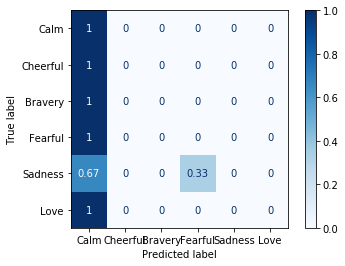

In [5]:
print_res("Vanilla",x_train,y_train,rscv)
disp_tree(rscv.best_estimator_,"FinalTrainingSet.csv")
test_res("Vanilla",x_val,y_val,rscv)

Best Score: 0.6813
criterion => gini
max_depth => 36
min_samples_leaf => 0.0031299385321771384
min_samples_split => 0.0022751910270725206
splitter => best
Splits: 5
Random Oversampling Train Accuracy: 89.2000%


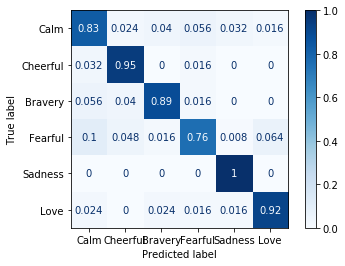

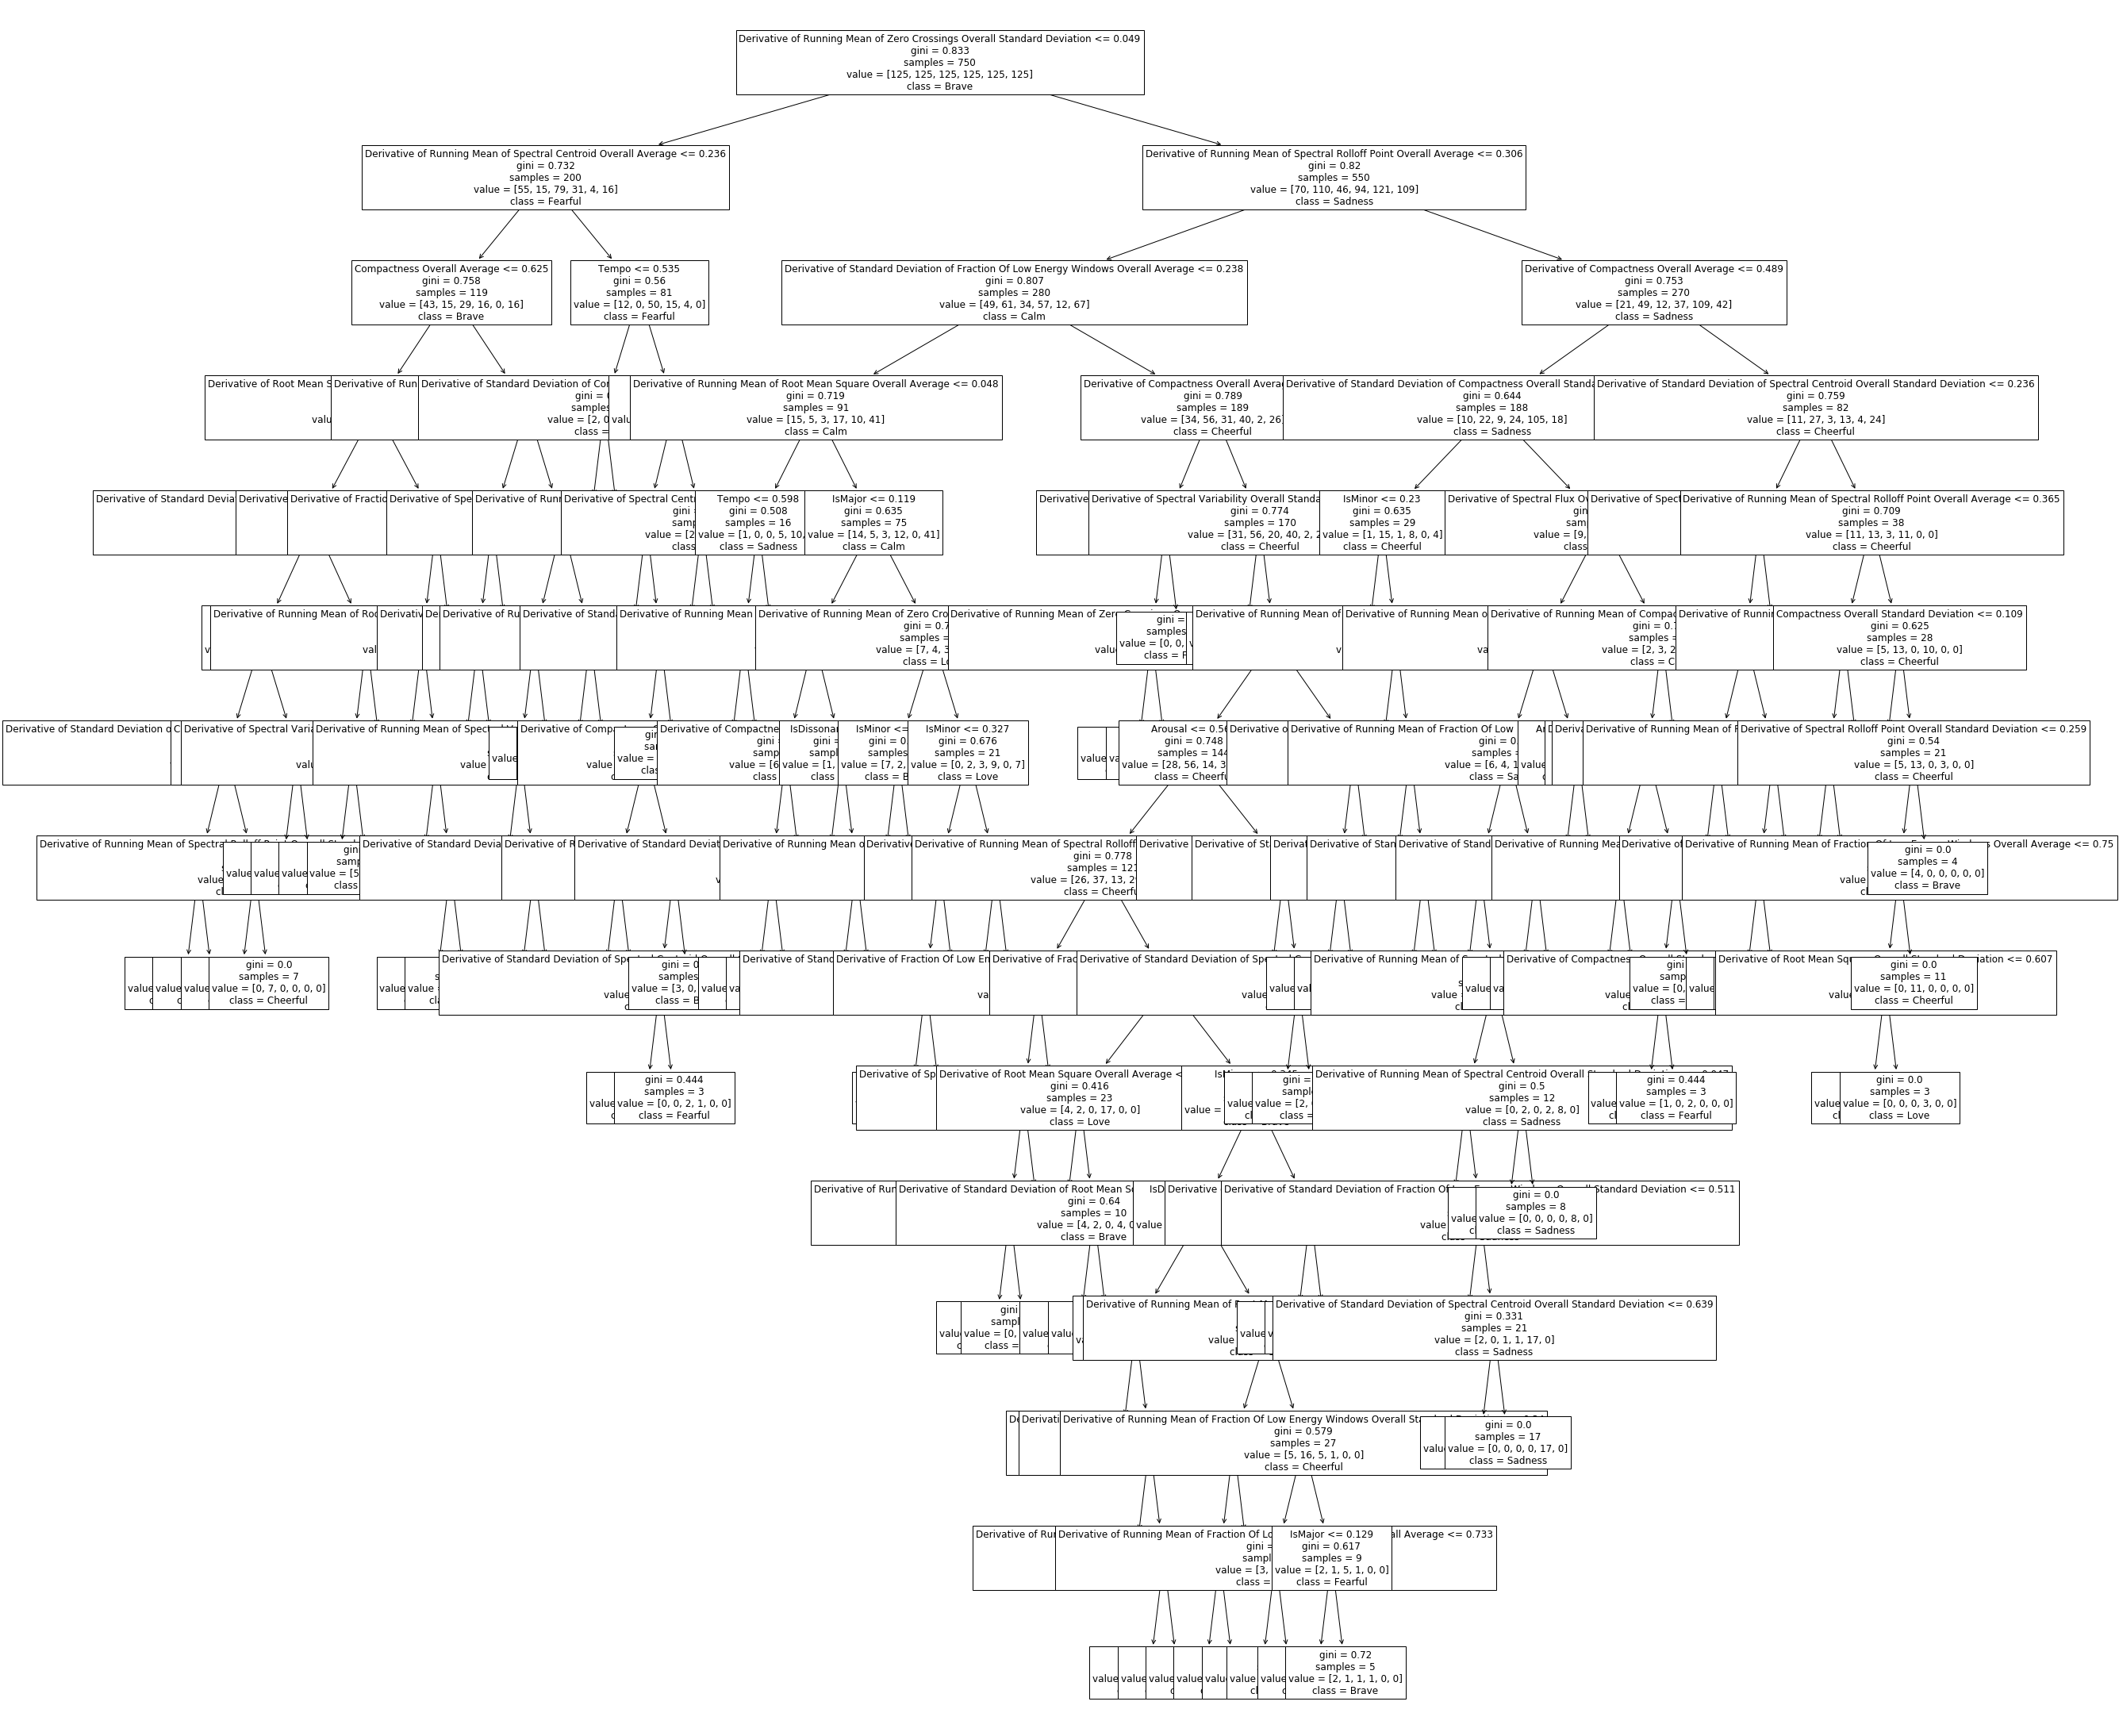

Random Oversampling Validation Accuracy: 47.62%
Random Oversampling F1-score: 0.44


(47.61904761904761, 0.4428571428571429)

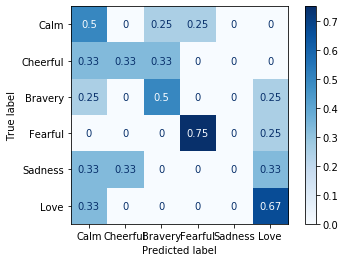

In [6]:
print_res("Random Oversampling",x_os,y_os,rscv)
disp_tree(rscv.best_estimator_,"FinalTrainingSet.csv")
test_res("Random Oversampling",x_val,y_val,rscv)

Best Score: 0.5600
criterion => gini
max_depth => 36
min_samples_leaf => 0.0031299385321771384
min_samples_split => 0.0022751910270725206
splitter => best
Splits: 5
SMOTE Train Accuracy: 87.4667%


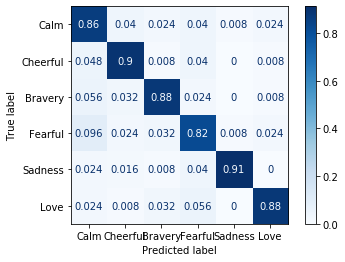

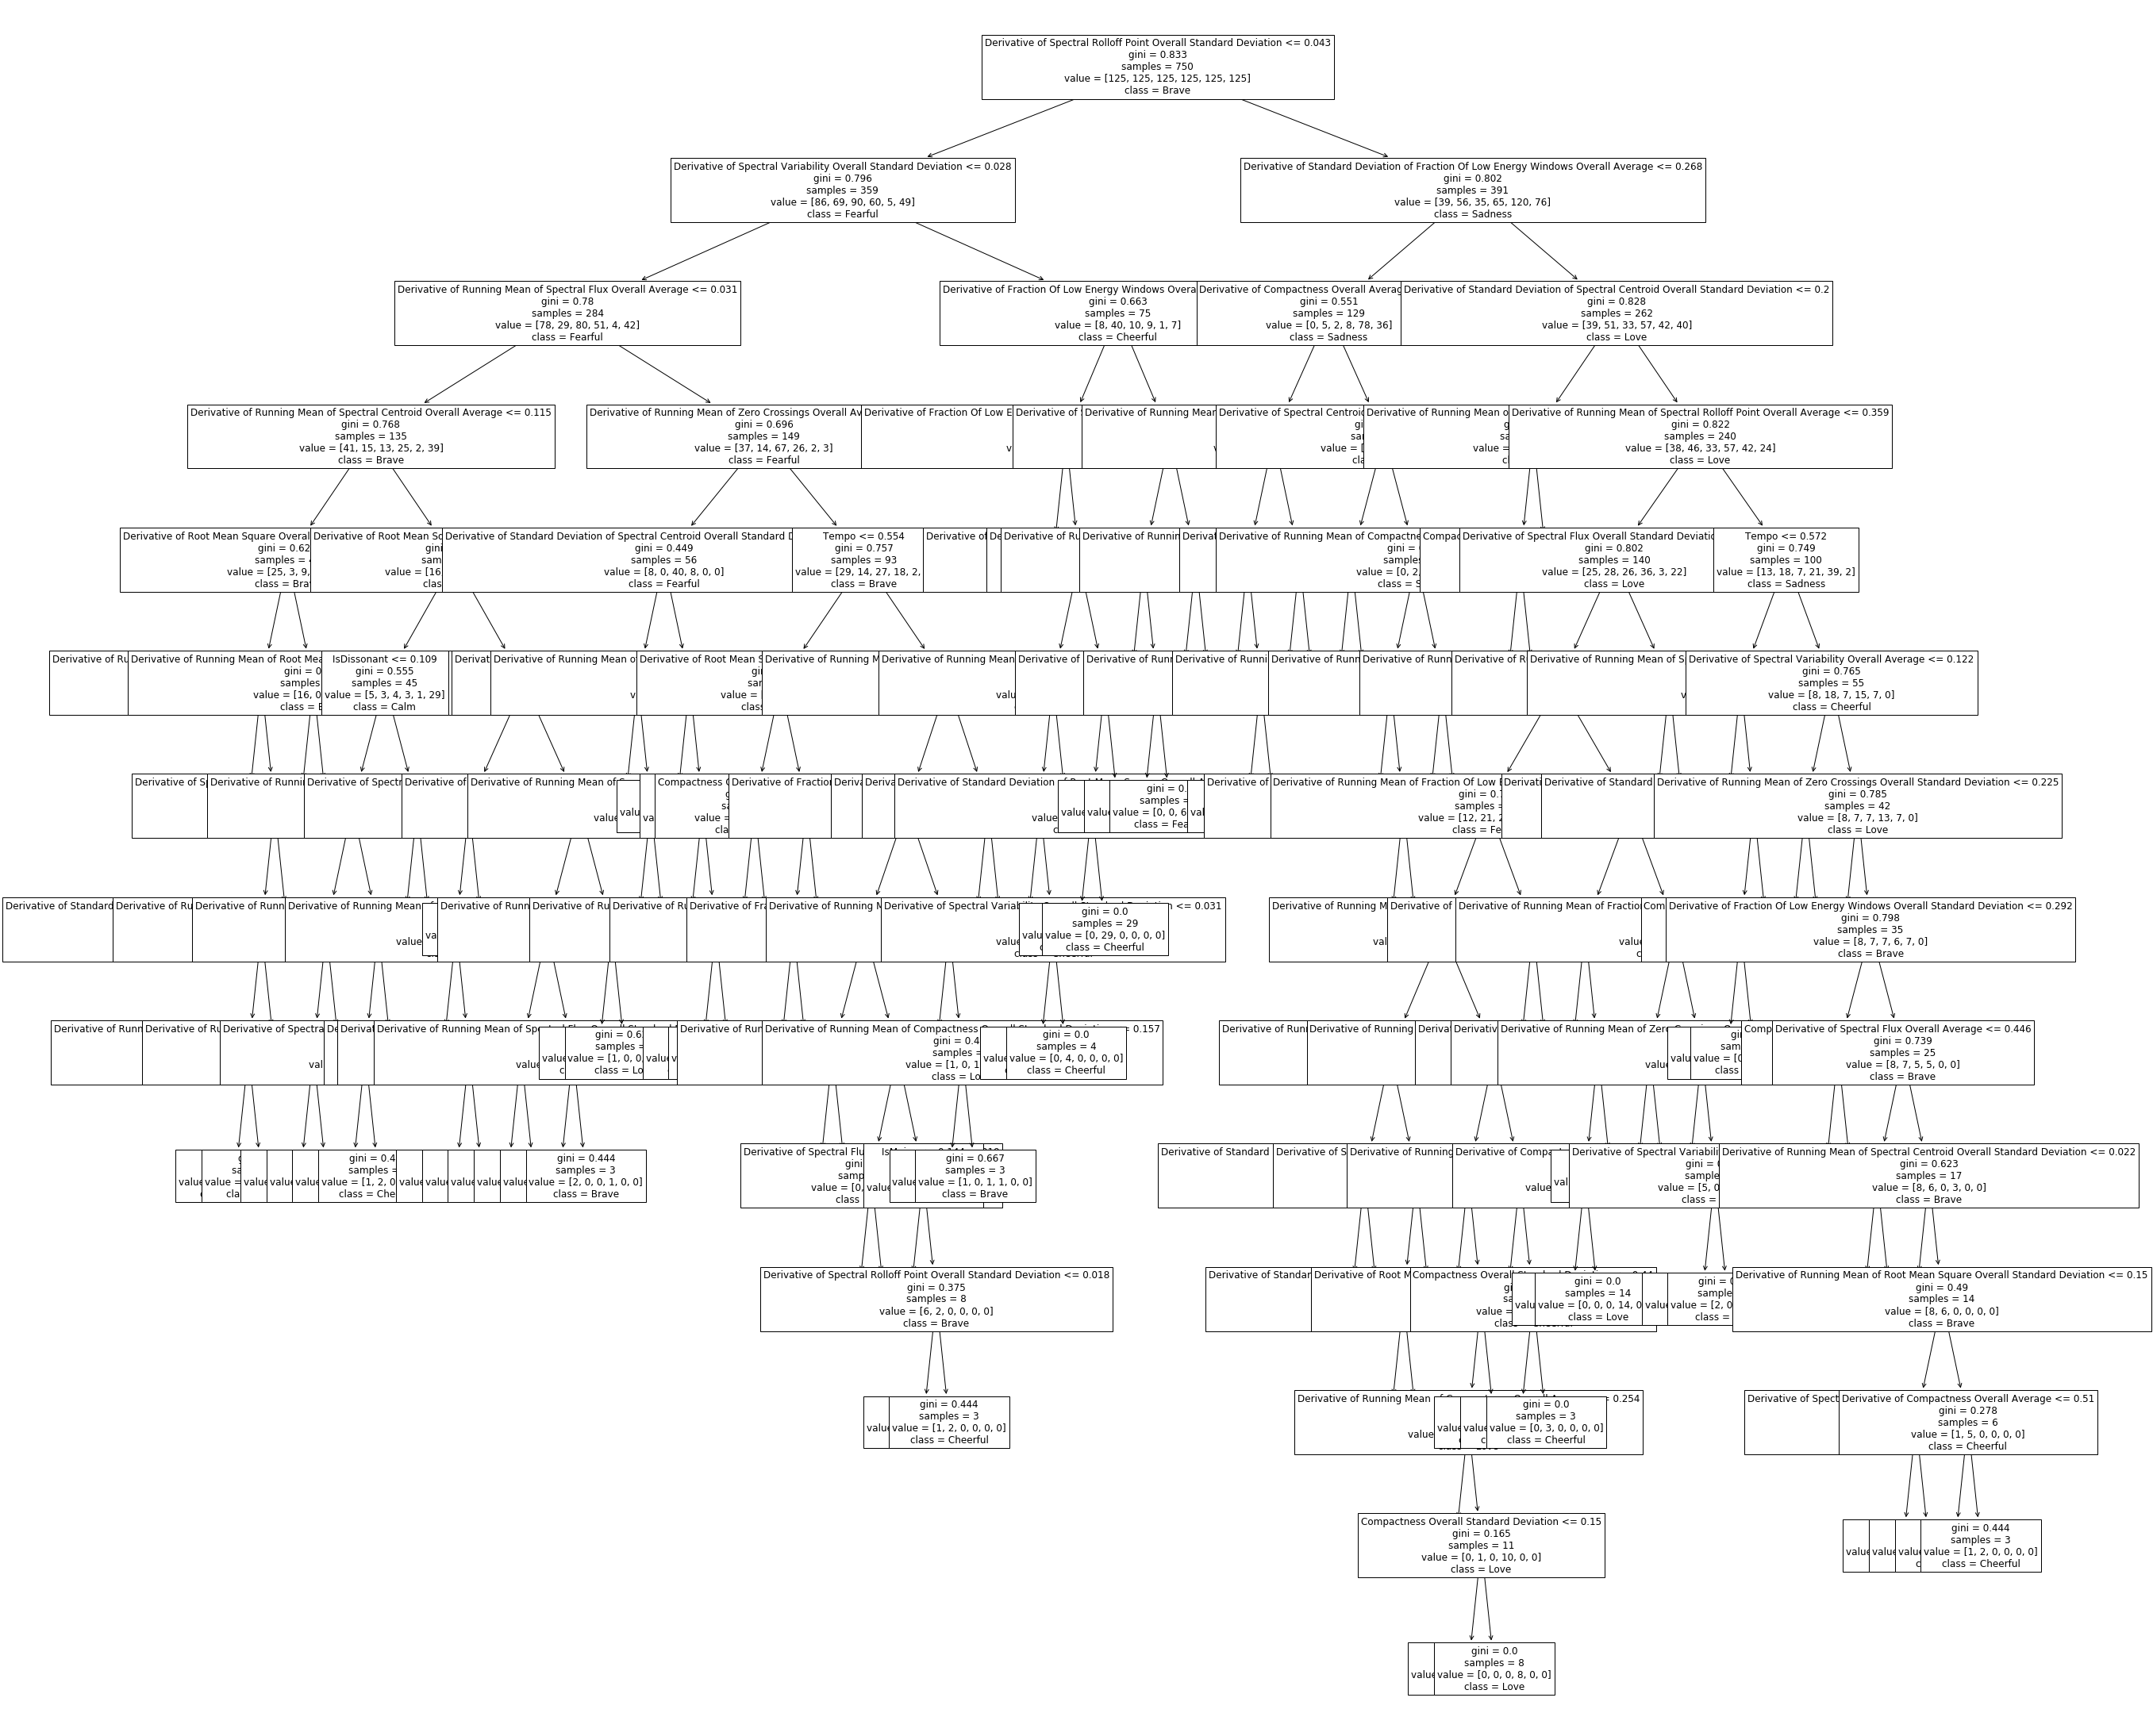

SMOTE Validation Accuracy: 28.57%
SMOTE F1-score: 0.29


(28.57142857142857, 0.2857142857142857)

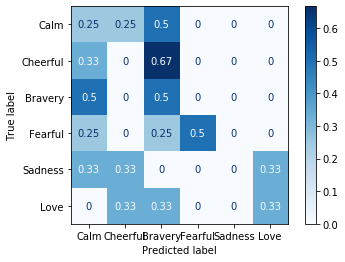

In [7]:
print_res("SMOTE",x_smote,y_smote,rscv)
disp_tree(rscv.best_estimator_,"FinalTrainingSet.csv")
test_res("SMOTE",x_val,y_val,rscv)

In [41]:
# extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=50,\
#                                              random_state=481516234))

# 19.05% 0.14
feat_sel_2 = SelectFromModel(\
                estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.25, penalty="l1", dual=False,\
#                                     random_state=481516234))
# feat_sel_2 = SelectKBest(mutual_info_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 69) (750,)
(750, 69) (750,)


In [42]:
# Random Forest
random_search_iterations = 500
n_splits = 5
rand_seed = 108750183

parameters = {
    'n_estimators' : [i for i in range(50,101)],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [i for i in range(1,num_features + 1)],
    'min_samples_split' : uniform(loc=0.01,scale=0.99),
    'min_samples_leaf' : uniform(loc=0.01,scale=0.49),
    'bootstrap' : [True, False],
    'warm_start' : [True, False],
}

# train classifier for SMOTE data
random_forest = RandomForestClassifier(random_state=rand_seed)
random_search_random_forest = \
                        RandomizedSearchCV(random_forest, parameters,\
                                           cv=n_splits, \
                                           random_state=rand_seed, \
                                           n_iter=random_search_iterations,\
                                           n_jobs=-1)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 69) (750,)
(750, 69) (750,)


Best Score: 0.3316
bootstrap => False
criterion => entropy
max_depth => 30
min_samples_leaf => 0.3478425278255751
min_samples_split => 0.9795481940103897
n_estimators => 59
warm_start => False
Splits: 5
Vanilla Train Accuracy: 35.6608%
Vanilla Validation Accuracy: 19.05%
Vanilla F1-score: 0.06


(19.047619047619047, 0.06095238095238095)

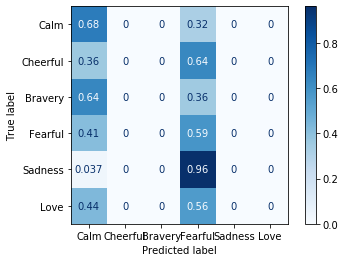

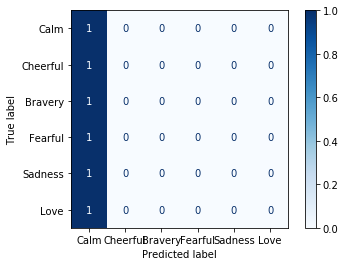

In [43]:
print_res("Vanilla",x_train,y_train,random_search_random_forest)
test_res("Vanilla",x_val,y_val,random_search_random_forest)

Best Score: 0.5840
bootstrap => False
criterion => gini
max_depth => 41
min_samples_leaf => 0.03502573819820971
min_samples_split => 0.042277265142412326
n_estimators => 85
warm_start => True
Splits: 5
Random Oversampling Train Accuracy: 72.6667%
Random Oversampling Validation Accuracy: 19.05%
Random Oversampling F1-score: 0.10


(19.047619047619047, 0.10185892538833714)

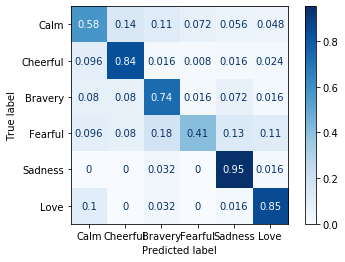

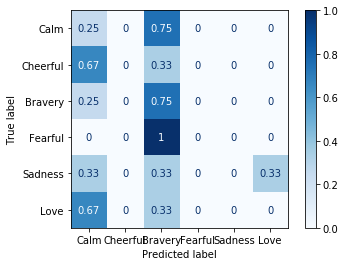

In [44]:
print_res("Random Oversampling",x_os,y_os,random_search_random_forest)
test_res("Random Oversampling",x_val,y_val,random_search_random_forest)

Best Score: 0.5120
bootstrap => False
criterion => gini
max_depth => 41
min_samples_leaf => 0.03502573819820971
min_samples_split => 0.042277265142412326
n_estimators => 85
warm_start => True
Splits: 5
SMOTE Train Accuracy: 72.8000%
SMOTE Validation Accuracy: 19.05%
SMOTE F1-score: 0.14


(19.047619047619047, 0.13650793650793652)

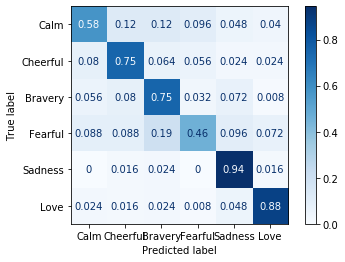

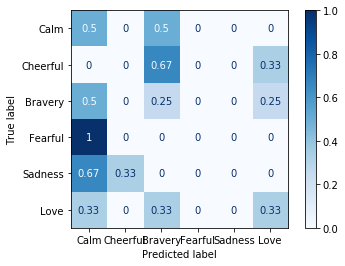

In [45]:
print_res("SMOTE",x_smote,y_smote,random_search_random_forest)
test_res("SMOTE",x_val,y_val,random_search_random_forest)